# UTS PPW
Soal uts

1.	Lakukan analisa klasifikasikan berita dengan extraksi fitur model topik modelling dengan classifier naïve bayes dan SVM (data https://drive.google.com/file/d/1a776C4mmVbC-84gx_No0is9QDfpWFIme/view?usp=drive_link

2.	Lakukan  analisa clutering dokumen pada data email berikut
https://drive.google.com/file/d/1wyFO8424PDG8sDZ_6mBJvoKfiwbWnDe7/view?usp=drive_link


## Analisis Soal 1: Klasifikasi Berita

Bagian ini bertujuan untuk melakukan klasifikasi berita ke dalam kategori yang sudah ditentukan menggunakan dua algoritma klasifikasi: Naive Bayes dan Support Vector Machine (SVM). Langkah-langkah yang dilakukan meliputi:

1.  **Memuat Data Berita**: Membaca dataset berita dari file CSV.
2.  **Pra-pemrosesan Teks**: Membersihkan teks berita dari karakter yang tidak relevan, angka, dan *stop words* (kata-kata umum yang tidak memiliki makna diskriminatif).
3.  **Ekstraksi Fitur (Topic Modeling - LDA)**: Mengubah teks bersih menjadi representasi numerik menggunakan Latent Dirichlet Allocation (LDA) untuk mengekstrak topik-topik utama dalam berita. Hasilnya akan digunakan sebagai fitur untuk klasifikasi.
4.  **Klasifikasi**: Melatih model Naive Bayes dan SVM menggunakan fitur yang diekstraksi dan mengevaluasi performa kedua model dalam mengklasifikasikan berita baru.

### 1.  **Memuat Data Berita**: Membaca dataset berita dari file CSV.

In [1]:
    # --- Analisis Soal 1: Klasifikasi Berita ---
    print("--- Analisis Soal 1: Klasifikasi Berita ---")
    # 1. Memuat Data Berita

    import pandas as pd
    import re
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.decomposition import LatentDirichletAllocation
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score, classification_report

    df_berita = pd.read_csv('Berita.csv')
    print("Data Berita.csv berhasil dimuat.")
    display(df_berita)


--- Analisis Soal 1: Klasifikasi Berita ---
Data Berita.csv berhasil dimuat.


,No,judul,berita,tanggal,kategori,link
0,1,Airlangga Harap Kenaikan UMP Tingkatkan Daya B...,Menteri Koordinator (Menko) Bidang Perekonomia...,"Minggu, 01 Des 2024 23:40 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412012...
1,2,PT SIER Beri Penghargaan untuk 50 Tenant Terba...,"Dalam rangka memeriahkan hari jadi ke-50, PT S...","Minggu, 01 Des 2024 20:45 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412012...
2,3,Prabowo Bakal Bentuk Kementerian Penerimaan Ne...,Wacana Presiden Prabowo Subianto akan membentu...,"Minggu, 01 Des 2024 19:40 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...
3,4,Sinergi Kemenag & BPJS Ketenagakerjaan Lindung...,BPJS Ketenagakerjaan dan Kementerian Agama (Ke...,"Minggu, 01 Des 2024 19:03 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...
4,5,Pemerintah Segera Bentuk Satgas PHK Usai Tetap...,Pemerintah akan segera membentuk Satuan Tugas ...,"Minggu, 01 Des 2024 19:00 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...
...,...,...,...,...,...,...
1495,1496,Laporan Sebab Tabrakan Pesawat-Black Hawk Dita...,Anggota Dewan Keselamatan Transportasi Nasiona...,"Jumat, 31 Jan 2025 04:40 WIB",Internasional,https://www.cnnindonesia.com/internasional/202...
1496,1497,"Israel Bebaskan 110 Sandera Palestina, Diantar...",Israel telah membebaskan 110 tahanan Palestina...,"Jumat, 31 Jan 2025 03:01 WIB",Internasional,https://www.cnnindonesia.com/internasional/202...
1497,1498,Hamas Konfirmasi Kematian Komandan Al Qassam M...,Hamas mengonfirmasi kematian kepala militernya...,"Jumat, 31 Jan 2025 02:30 WIB",Internasional,https://www.cnnindonesia.com/internasional/202...
1498,1499,Black Box American Airlines Ditemukan Usai Tab...,Tim penyelam diduga menemukan satu dari dua bl...,"Jumat, 31 Jan 2025 01:00 WIB",Internasional,https://www.cnnindonesia.com/internasional/202...


### 2.  **Pre-processing Teks**: Membersihkan teks berita dari karakter yang tidak relevan, angka, dan *stop words* (kata-kata umum yang tidak memiliki makna diskriminatif).

In [2]:
    # 2. Pra-pemrosesan Teks
    # Memilih kolom 'berita' (teks berita) dan 'kategori' (label kelas).
    # Menghapus baris yang memiliki nilai kosong (NaN) pada kolom yang dipilih.
    df_berita = df_berita[['berita', 'kategori']].copy()
    df_berita.dropna(inplace=True)

    # Daftar stop words dalam Bahasa Indonesia. Stop words adalah kata-kata umum yang sering muncul
    # tetapi tidak memiliki makna diskriminatif untuk klasifikasi, sehingga perlu dihapapus.
    stop_words_indonesia_manual = [
        'ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan', 'berkenaan', 'berlainan', 'berlalu', 'berlangsung', 'berlebihan', 'bermacam', 'bermacam-macam', 'bermaksud', 'bermula', 'bersama', 'bersama-sama', 'bersiap', 'bersiap-siap', 'bertanya', 'bertanya-tanya', 'berturut', 'berturut-turut', 'bertutur', 'berujar', 'berupa', 'besar', 'betul', 'betulkah', 'biasa', 'biasanya', 'bila', 'bilakah', 'bisa', 'bisakah', 'boleh', 'bolehkah', 'bolehlah', 'buat', 'bukan', 'bukankah', 'bukanlah', 'bukannya', 'bulan', 'bung', 'cara', 'caranya', 'cukup', 'cukupkah', 'cukuplah', 'cuma', 'dahulu', 'dalam', 'dan', 'dapat', 'dari', 'daripada', 'datang', 'demi', 'demikian', 'demikianlah', 'dengan', 'depan', 'di', 'dia', 'diakhiri', 'diakhirinya', 'dialah', 'diantara', 'diantaranya', 'diberi', 'diberikan', 'diberikannya', 'dibuat', 'dibuatnya', 'didapat', 'didatangkan', 'digunakan', 'diibaratkan', 'diibaratkannya', 'diingat', 'diingatkan', 'diinginkan', 'dijawab', 'dijelaskan', 'dijelaskannya', 'dikarenakan', 'dikatakan', 'dikatakannya', 'dikerjakan', 'diketahui', 'diketahuinya', 'dikiranya', 'dilakukan', 'dilalui', 'dilihat', 'dimaksud', 'dimaksudkan', 'dimaksudkannya', 'dimaksudnya', 'diminta', 'dimintai', 'dimisalkan', 'dimulai', 'dimulailah', 'dimulainya', 'dimungkinkan', 'dini', 'dipastikan', 'diperbuat', 'diperbuatnya', 'dipergunakan', 'diperkirakan', 'diperlihatkan', 'diperlukan', 'diperlukannya', 'dipersoalkan', 'dipertanyakan', 'dipunyai', 'diri', 'dirinya', 'disampaikan', 'disebut', 'disebutkan', 'disebutkannya', 'disini', 'disinilah', 'ditambahkan', 'ditambahkannya', 'ditanya', 'ditanyai', 'ditanyakan', 'ditegaskan', 'ditujukan', 'ditunjuk', 'ditunjuki', 'ditunjukkan', 'ditunjuknya', 'dituturkan', 'dituturkannya', 'diucapkan', 'diucapkannya', 'diungkapkan', 'dong', 'dulu', 'empat', 'enggak', 'enggaklah', 'entah', 'entahlah', 'guna', 'gunakan', 'hal', 'hampir', 'hanya', 'hanyalah', 'hari', 'harus', 'haruslah', 'harusnya', 'hendak', 'hendaklah', 'hendaknya', 'hingga', 'ia', 'ialah', 'ibarat', 'ibaratnya', 'ibu', 'ikut', 'ingat', 'ingat-ingat', 'ingin', 'inginkah', 'inginkan', 'ini', 'inikah', 'inilah', 'itu', 'itukah', 'itulah', 'jadi', 'jadilah', 'jadinya', 'jangan', 'jangankan', 'janganlah', 'jauh', 'jawab', 'jawaban', 'jawabnya', 'jelas', 'jelaskan', 'jelaslah', 'jelasnya', 'jika', 'jikalau', 'juga', 'jumlah', 'jumlahnya', 'justru', 'kala', 'kalau', 'kalaulah', 'kalaupun', 'kali', 'kalian', 'kami', 'kamilah', 'kamu', 'kamulah', 'kan', 'kapan', 'kapankah', 'kapanpun', 'karena', 'karenanya', 'kasus', 'kata', 'katakan', 'katakanlah', 'katanya', 'ke', 'keadaan', 'kebetulan', 'kecil', 'kedua', 'keduanya', 'keinginan', 'kelak', 'kelima', 'keluar', 'kembali', 'kemudian', 'kemungkinan', 'kemungkinannya', 'kenapa', 'kepada', 'kepadanya', 'kesampaian', 'keseluruhan', 'keseluruhannya', 'keterlaluan', 'ketika', 'khususnya', 'kini', 'kinilah', 'kira', 'kira-kira', 'kiranya', 'kita', 'kitalah', 'kok', 'kurang', 'lagi', 'lagian', 'lah', 'lain', 'lainnya', 'lalu', 'lama', 'lamanya', 'lanjut', 'lanjutnya', 'lebih', 'lewat', 'lima', 'luar', 'macam', 'maka', 'makanya', 'makin', 'malah', 'malahan', 'mampu', 'mampukah', 'mana', 'manakala', 'manalagi', 'masa', 'masalah', 'masalahnya', 'masih', 'masihkah', 'masing', 'masing-masing', 'mau', 'maupun', 'melainkan', 'melakukan', 'melalui', 'melihat', 'melihatnya', 'memang', 'memastikan', 'memberi', 'memberikan', 'membuat', 'memerlukan', 'memihak', 'meminta', 'memintakan', 'memisalkan', 'memperbuat', 'mempergunakan', 'memperkirakan', 'memperlihatkan', 'mempersiapkan', 'mempersoalkan', 'mempertanyakan', 'mempunyai', 'memulai', 'memungkinkan', 'menjadi', 'menjawab', 'menjelaskan', 'menuju', 'menurut', 'menuturkan', 'menyampaikan', 'menyangkut', 'menyatakan', 'menyebutkan', 'menyeluruh', 'menyiapkan', 'merasa', 'mereka', 'merekalah', 'merupakan', 'meski', 'meskipun', 'meyakini', 'meyakinkan', 'minta', 'mirip', 'misal', 'misalkan', 'misalnya', 'mula', 'mulai', 'mulailah', 'mulanya', 'mungkin', 'mungkinkah', 'nah', 'naik', 'namun', 'nanti', 'nantinya', 'nyaris', 'nyatanya', 'oleh', 'olehnya', 'pada', 'padahal', 'padanya', 'pak', 'paling', 'panjang', 'pantas', 'para', 'pasti', 'pastilah', 'penting', 'pentingnya', 'per', 'percuma', 'perlu', 'perlukah', 'perlunya', 'pernah', 'persoalan', 'pertama', 'pertama-tama', 'pertanyaan', 'pertanyakan', 'pihak', 'pihaknya', 'pukul', 'pula', 'pun', 'punya', 'rasa', 'rasanya', 'rata', 'rupanya', 'saat', 'saatnya', 'saja', 'sajalah', 'salam', 'saling', 'sama', 'sama-sama', 'sambil', 'sampai', 'sampai-sampai', 'sampaikan', 'sana', 'sangat', 'sangatlah', 'sangkut', 'satu', 'saya', 'sayalah', 'se', 'sebab', 'sebabnya', 'sebagai', 'sebagaimana', 'sebagainya', 'sebagian', 'sebaik', 'sebaik-baiknya', 'sebaiknya', 'sebaliknya', 'sebanyak', 'sebelum', 'sebelumnya', 'sebenarnya', 'seberapa', 'sebesar', 'sebetulnya', 'sebisanya', 'sebuah', 'sebut', 'sebutlah', 'sebutnya', 'secara', 'secukupnya', 'sedang', 'sedangkan', 'sedemikian', 'sedikit', 'sedikitnya', 'seenaknya', 'segala', 'segalanya', 'segera', 'seharusnya', 'sehingga', 'seingat', 'sejak', 'sejauh', 'sejenak', 'sejumlah', 'sekadar', 'sekadarnya', 'sekali', 'sekali-kali', 'sekalian', 'sekaligus', 'sekalipun', 'sekarang', 'sekaranglah', 'sekecil', 'seketika', 'sekiranya', 'sekitar', 'sekitarnya', 'sela', 'selain', 'selaku', 'selalu', 'selama', 'selama-lamanya', 'selamanya', 'selanjutnya', 'seluruh', 'seluruhnya', 'semacam', 'semakin', 'semampu', 'semampunya', 'semasa', 'semasih', 'semata', 'semata-mata', 'semaunya', 'sementara', 'semisal', 'semisalnya', 'sempat', 'semua', 'semuanya', 'semula', 'sendiri', 'sendirian', 'sendirinya', 'seolah', 'seolah-olah', 'seorang', 'sepanjang', 'sepantasnya', 'sepantasnyalah', 'seperlunya', 'seperti', 'sepertinya', 'sepeserpun', 'sering', 'seringnya', 'serta', 'serupa', 'sesaat', 'sesampai', 'sesegera', 'sesekali', 'seseorang', 'sesuatu', 'sesuatunya', 'sesudah', 'sesudahnya', 'setelah', 'setempat', 'setengah', 'seterusnya', 'setiap', 'setiba', 'setibanya', 'setidak-tidaknya', 'setidaknya', 'setinggi', 'seusai', 'sewaktu', 'siap', 'siapa', 'siapakah', 'siapapun', 'sini', 'sinilah', 'soal', 'soalnya', 'suatu', 'sudah', 'sudahkah', 'sudahlah', 'supaya', 'tadi', 'tadinya', 'tahu', 'tahun', 'tak', 'tambah', 'tambahnya', 'tampak', 'tampaknya', 'tandas', 'tandasnya', 'tanpa', 'tanya', 'tanyakan', 'tanyanya', 'tapi', 'tegas', 'tegasnya', 'telah', 'tempat', 'tengah', 'tentang', 'tentu', 'tentulah', 'tentunya', 'tepat', 'terakhir', 'terang', 'terbanyak', 'terdahulu', 'terdapat', 'terdiri', 'terhadap', 'terhadapnya', 'teringat', 'teringat-ingat', 'terjadi', 'terjadilah', 'terjadinya', 'terkira', 'terlalu', 'terlebih', 'terlihat', 'termasuk', 'ternyata', 'tersampaikan', 'tersebut', 'tersebutlah', 'tertentu', 'tertuju', 'terus', 'terutama', 'tetap', 'tetapi', 'tiap', 'tiba', 'tiba-tiba', 'tidak', 'tidakkah', 'tidaklah', 'toh', 'tunjuk', 'turut', 'tutur', 'tuturnya', 'ucap', 'ucapnya', 'ujar', 'ujarnya', 'umum', 'umumnya', 'ungkap', 'ungkapnya', 'untuk', 'usah', 'usai', 'wah', 'wahai', 'waktu', 'waktunya', 'walau', 'walaupun', 'wong', 'yaitu', 'yakin', 'yakni', 'yang'
    ]

    # Fungsi untuk membersihkan teks: mengubah ke lowercase, menghapus angka dan tanda baca,
    # serta menghapus stop words.
    def preprocess_text(text):
        text = text.lower()
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        tokens = [word for word in text.split() if word not in stop_words_indonesia_manual]
        return " ".join(tokens)

    # Menerapkan fungsi pra-pemrosesan ke kolom 'berita' dan menyimpannya di kolom baru 'berita_bersih'.
    df_berita['berita_bersih'] = df_berita['berita'].apply(preprocess_text)

    display(df_berita['berita_bersih'])

,berita_bersih
0,menteri koordinator menko bidang perekonomian ...
1,rangka memeriahkan pt surabaya industrial esta...
2,wacana presiden prabowo subianto membentuk mem...
3,bpjs ketenagakerjaan kementerian agama kemenag...
4,pemerintah membentuk satuan tugas pemutusan hu...
...,...
1495,anggota dewan keselamatan transportasi nasiona...
1496,israel membebaskan tahanan palestina kamis pem...
1497,hamas mengonfirmasi kematian kepala militernya...
1498,tim penyelam diduga menemukan dua black box ko...


### 3.  **Ekstraksi Fitur (Topic Modeling - LDA)**: Mengubah teks bersih menjadi representasi numerik menggunakan Latent Dirichlet Allocation (LDA) untuk mengekstrak topik-topik utama dalam berita. Hasilnya akan digunakan sebagai fitur untuk klasifikasi.

In [3]:
    # 3. Ekstraksi Fitur (Topic Modeling - LDA)
    # Menggunakan CountVectorizer untuk mengubah teks bersih menjadi matriks hitungan token.
    # max_df=0.95 berarti mengabaikan kata-kata yang muncul di lebih dari 95% dokumen.
    # min_df=2 berarti mengabaikan kata-kata yang muncul di kurang dari 2 dokumen.
    vectorizer = CountVectorizer(max_df=0.95, min_df=2)
    dtm = vectorizer.fit_transform(df_berita['berita_bersih'])

    # Menggunakan Latent Dirichlet Allocation (LDA) untuk melakukan topic modeling.
    # n_components menentukan jumlah topik yang ingin diekstraksi.
    n_topics = 5
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    # Melatih model LDA dan mengubah matriks hitungan menjadi distribusi topik untuk setiap dokumen.
    lda_features = lda.fit_transform(dtm)
    print(f"\nUkuran fitur dari LDA: {lda_features.shape}")
    # Output shape (jumlah dokumen, jumlah topik) menunjukkan bahwa setiap dokumen direpresentasikan
    # sebagai vektor probabilitas keanggotaan topik.


Ukuran fitur dari LDA: (1500, 5)


In [4]:
# Menampilkan komponen LDA
# Setiap baris merepresentasikan topik, dan setiap kolom merepresentasikan kata.
# Nilai dalam matriks menunjukkan bobot kata dalam topik tersebut.
print("\nKomponen LDA (Distribusi Kata per Topik):")
display(pd.DataFrame(lda.components_, columns=vectorizer.get_feature_names_out()))

# Untuk melihat kata-kata teratas per topik:
print("\nKata-kata Teratas per Topik:")
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topik #{topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))


Komponen LDA (Distribusi Kata per Topik):


,aa,aan,aaron,abad,abadi,abang,abbas,abc,abdel,abdelaziz,...,zonasi,zonasinya,zone,zoom,zudan,zuhri,zulhas,zulhaszulhas,zulkifli,zwolle
0,2.277527,5.199149,0.200000,0.201750,0.200660,3.925506,0.200000,2.272213,0.200000,0.200000,...,3.195763,2.199999,2.197512,0.208874,0.200043,0.200000,0.200059,0.200105,0.200434,0.200000
1,0.200001,0.200000,2.194381,1.197013,0.200638,0.200019,0.200000,0.200000,4.199920,1.510884,...,0.200001,0.200000,0.200000,0.200001,0.200000,0.200000,0.200026,0.200086,0.200013,4.199834
2,0.200002,0.200000,0.205438,0.202663,9.197979,0.203203,0.200001,0.200001,0.200544,0.889116,...,0.202966,0.200000,0.200001,0.200001,0.200001,0.200407,0.200298,0.200001,0.200600,0.200166
3,2.122470,0.200850,0.200000,3.198573,0.200722,1.471271,9.207731,0.200000,0.200199,0.200000,...,0.208310,0.200000,0.202419,3.191124,10.199956,0.203249,46.199617,3.199807,19.198953,0.200000
4,0.200001,0.200000,0.200181,0.200001,0.200000,0.200001,8.192268,2.127786,7.199336,0.200000,...,11.192960,0.200000,3.200069,0.200001,0.200000,6.196343,0.200000,0.200000,0.200000,0.200000



Kata-kata Teratas per Topik:
Topik #0:
laut pagar korban mengatakan warga orang kecamatan desa banjir yoon
Topik #1:
indonesia pemain piala timnas gol menit laga liga pertandingan poin
Topik #2:
indonesia timnas pelatih kluivert laut pssi pagar shin brics sertifikat
Topik #3:
rp persen program prabowo jakarta pemerintah indonesia cnn juta kpk
Topik #4:
israel senjata gencatan gaza presiden kebakaran as trump negara orang


### 4.  **Klasifikasi**: Melatih model Naive Bayes dan SVM menggunakan fitur yang diekstraksi dan mengevaluasi performa kedua model dalam mengklasifikasikan berita baru.

In [5]:
try:
    # 4. Klasifikasi
    # Mempersiapkan data untuk klasifikasi. X adalah fitur (hasil LDA), y adalah label (kategori berita).
    X = lda_features
    y = df_berita['kategori']

    # Membagi data menjadi set pelatihan dan pengujian (80% pelatihan, 20% pengujian).
    # random_state=42 memastikan pembagian yang sama setiap kali kode dijalankan.
    # stratify=y memastikan proporsi setiap kelas (kategori) sama di set pelatihan dan pengujian.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # --- Klasifikasi dengan Naive Bayes ---
    print("\n--- Classifier: Naive Bayes ---")
    # Menginisialisasi model Naive Bayes Multinomial (cocok untuk data hitungan atau frekuensi).
    nb_classifier = MultinomialNB()
    # Melatih model Naive Bayes menggunakan data pelatihan.
    nb_classifier.fit(X_train, y_train)
    # Melakukan prediksi pada data pengujian.
    y_pred_nb = nb_classifier.predict(X_test)
    # Menghitung dan mencetak akurasi model.
    print("Akurasi Naive Bayes:", accuracy_score(y_test, y_pred_nb))
    # Menampilkan laporan klasifikasi yang mencakup precision, recall, f1-score, dan support
    # untuk setiap kelas. zero_division=0 mencegah warning jika ada kelas yang tidak memiliki prediksi.
    print("Laporan Klasifikasi Naive Bayes:")
    print(classification_report(y_test, y_pred_nb, zero_division=0))

    # --- Klasifikasi dengan Support Vector Machine (SVM) ---
    print("\n--- Classifier: Support Vector Machine (SVM) ---")
    # Menginisialisasi model SVM dengan kernel linear.
    svm_classifier = SVC(kernel='linear', random_state=42)
    # Melatih model SVM menggunakan data pelatihan.
    svm_classifier.fit(X_train, y_train)
    # Melakukan prediksi pada data pengujian.
    y_pred_svm = svm_classifier.predict(X_test)
    # Menghitung dan mencetak akurasi model.
    print("Akurasi SVM:", accuracy_score(y_test, y_pred_svm))
    # Menampilkan laporan klasifikasi yang mencakup precision, recall, f1-score, dan support
    # untuk setiap kelas. zero_division=0 mencegah warning jika ada kelas yang tidak memiliki prediksi.
    print("Laporan Klasifikasi SVM:")
    print(classification_report(y_test, y_pred_svm, zero_division=0))

except FileNotFoundError:
    print("Error: File 'Berita.csv' tidak ditemukan. Pastikan file ada di direktori yang sama.")
except Exception as e:
    print(f"Terjadi error: {e}")


--- Classifier: Naive Bayes ---
Akurasi Naive Bayes: 0.7833333333333333
Laporan Klasifikasi Naive Bayes:
               precision    recall  f1-score   support

      Ekonomi       0.62      0.87      0.72        75
Internasional       0.98      0.77      0.87        75
     Nasional       0.61      0.51      0.55        75
     Olahraga       1.00      0.99      0.99        75

     accuracy                           0.78       300
    macro avg       0.80      0.78      0.78       300
 weighted avg       0.80      0.78      0.78       300


--- Classifier: Support Vector Machine (SVM) ---
Akurasi SVM: 0.78
Laporan Klasifikasi SVM:
               precision    recall  f1-score   support

      Ekonomi       0.62      0.89      0.73        75
Internasional       0.95      0.77      0.85        75
     Nasional       0.61      0.47      0.53        75
     Olahraga       1.00      0.99      0.99        75

     accuracy                           0.78       300
    macro avg       0.80  

## Analisis Soal 2: Clustering Email dengan Pencarian K Otomatis (Elbow Method)

Bagian ini bertujuan untuk melakukan *clustering* (pengelompokan) dokumen email secara otomatis. Metode yang digunakan adalah K-Means Clustering, dengan penentuan jumlah cluster (k) yang optimal menggunakan metode Elbow. Langkah-langkahnya adalah sebagai berikut:

1.  **Impor Library**: Mengimpor semua library Python yang diperlukan.
2.  **Memuat dan Membersihkan Data Email**: Membaca dataset email dari file CSV dan melakukan pra-pemrosesan teks dasar untuk membersihkan email.
3.  **Vektorisasi Teks (TF-IDF)**: Mengubah teks email yang sudah bersih menjadi representasi numerik menggunakan TF-IDF (Term Frequency-Inverse Document Frequency). Ini memberikan bobot pada kata-kata berdasarkan seberapa sering muncul dalam dokumen dan seberapa unik kata tersebut di seluruh koleksi dokumen.
4.  **Mencari Jumlah Cluster Optimal dengan Elbow Method**: Menggunakan metode Elbow untuk menghitung *Within-Cluster Sum of Squares* (WCSS) untuk berbagai jumlah cluster (k). Grafik WCSS versus k akan dibuat untuk membantu visualisasi dan penentuan "titik siku" (elbow) yang menunjukkan jumlah cluster optimal.
5.  **Melakukan Clustering Final dengan K yang Optimal**: Menerapkan algoritma K-Means dengan jumlah cluster (k) yang ditentukan dari metode Elbow.
6.  **Menampilkan Hasil Clustering**: Menampilkan distribusi dokumen di setiap cluster dan kata-kata paling penting (top terms) di setiap cluster.
7.  **Visualisasi Hasil Clustering Final**: Mengurangi dimensi data TF-IDF menjadi 2 dimensi menggunakan Principal Component Analysis (PCA) untuk memvisualisasikan hasil clustering dalam scatter plot 2D. Setiap titik dalam plot merepresentasikan email, dan warnanya menunjukkan cluster tempat email tersebut dikelompokkan.

### 1.  **Impor Library**: Mengimpor semua library Python yang diperlukan.

In [ ]:
# --- Soal 2: Clustering Email dengan Pencarian K Otomatis ---

# 1. Impor Library
# Mengimpor library yang dibutuhkan untuk analisis data, pra-pemrosesan teks,
# ekstraksi fitur, clustering, reduksi dimensi, dan visualisasi.
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

### 2.  **Memuat dan Membersihkan Data Email**: Membaca dataset email dari file CSV dan melakukan pra-pemrosesan teks dasar untuk membersihkan email.

In [ ]:
    print("--- Analisis Soal 2: Clustering Email dengan Elbow Method ---")
    # 2. Memuat dan Membersihkan Data Email
    # Memuat dataset email dari file CSV. File ini memiliki encoding 'latin1'.
    df_email = pd.read_csv('spam.csv', encoding='latin1')
    # Memilih dua kolom pertama dan mengganti namanya menjadi 'label' dan 'text'.
    df_email = df_email.iloc[:, :2]
    df_email.columns = ['label', 'text']
    # Menghapus baris yang memiliki nilai kosong pada kolom 'text'.
    df_email.dropna(subset=['text'], inplace=True)

    # Fungsi untuk membersihkan teks email: mengubah ke lowercase, menghapus angka dan tanda baca,
    # serta menghapus spasi berlebih.
    def preprocess_email_text(text):
        if isinstance(text, str):
            text = text.lower()
            text = re.sub(r'\d+', '', text)
            text = re.sub(r'[^\w\s]', '', text)
            return " ".join(text.split())
        return ""

    # Menerapkan fungsi pra-pemrosesan ke kolom 'text' dan menyimpannya di kolom baru 'text_bersih'.
    df_email['text_bersih'] = df_email['text'].apply(preprocess_email_text)
    display(df_email['text_bersih'])

--- Analisis Soal 2: Clustering Email dengan Elbow Method ---


,text_bersih
0,go until jurong point crazy available only in ...
1,ok lar joking wif u oni
2,free entry in a wkly comp to win fa cup final ...
3,u dun say so early hor u c already then say
4,nah i dont think he goes to usf he lives aroun...
...,...
5567,this is the nd time we have tried contact u u ...
5568,will ì_ b going to esplanade fr home
5569,pity was in mood for that soany other suggestions
5570,the guy did some bitching but i acted like id ...


### 3.  **Vektorisasi Teks (TF-IDF)**: Mengubah teks email yang sudah bersih menjadi representasi numerik menggunakan TF-IDF (Term Frequency-Inverse Document Frequency). Ini memberikan bobot pada kata-kata berdasarkan seberapa sering muncul dalam dokumen dan seberapa unik kata tersebut di seluruh koleksi dokumen.

In [ ]:
    # 3. Vektorisasi Teks (TF-IDF)
    # Menggunakan TfidfVectorizer untuk mengubah teks bersih menjadi representasi numerik TF-IDF.
    # max_df=0.90 mengabaikan kata-kata yang muncul di lebih dari 90% dokumen.
    # min_df=5 mengabaikan kata-kata yang muncul di kurang dari 5 dokumen.
    # stop_words='english' menghapus stop words Bahasa Inggris bawaan sklearn.
    tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=5, stop_words='english')
    # Melatih vectorizer dan mengubah teks bersih menjadi matriks TF-IDF.
    X_tfidf = tfidf_vectorizer.fit_transform(df_email['text_bersih'])
    print("Data email berhasil diproses dan diubah menjadi fitur TF-IDF.")

Data email berhasil diproses dan diubah menjadi fitur TF-IDF.


In [ ]:
# Menampilkan sebagian kecil dari matriks TF-IDF
# Matriks TF-IDF bisa sangat besar, jadi kita hanya menampilkan beberapa baris dan kolom pertama.
print("\nSebagian kecil dari Matriks TF-IDF:")
# Mengubah sparse matrix menjadi dense array untuk ditampilkan.
# Hati-hati dengan ini untuk dataset yang sangat besar karena bisa memakan banyak memori.
display(pd.DataFrame(X_tfidf[:10, :10].toarray(), columns=tfidf_vectorizer.get_feature_names_out()[:10]))

print("\nUkuran Matriks TF-IDF:", X_tfidf.shape)
# Output shape (jumlah dokumen, jumlah kata unik setelah filter)


Sebagian kecil dari Matriks TF-IDF:


,abiola,able,abt,accept,access,account,activate,actually,ad,add
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Ukuran Matriks TF-IDF: (5572, 1489)


### 4.  **Mencari Jumlah Cluster Optimal dengan Elbow Method**: Menggunakan metode Elbow untuk menghitung *Within-Cluster Sum of Squares* (WCSS) untuk berbagai jumlah cluster (k). Grafik WCSS versus k akan dibuat untuk membantu visualisasi dan penentuan "titik siku" (elbow) yang menunjukkan jumlah cluster optimal.

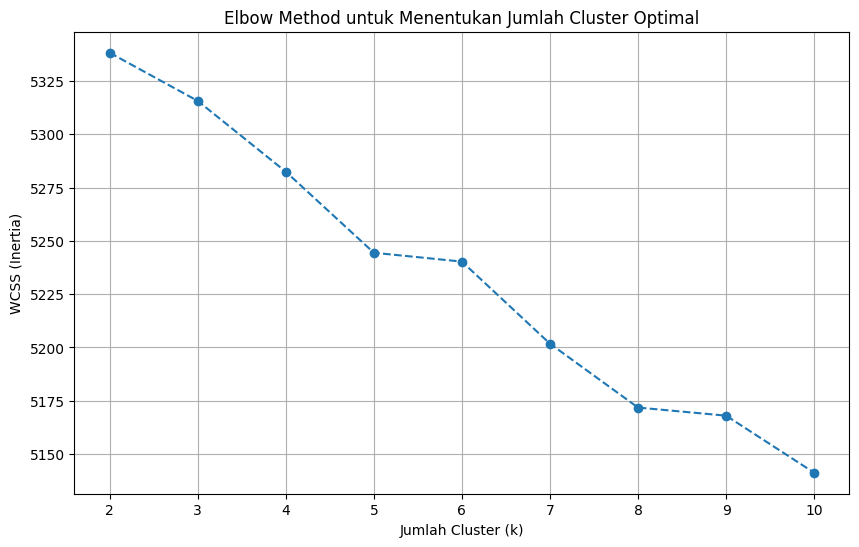


Dari grafik di atas, carilah titik 'siku' (elbow).
Titik di mana penurunan WCSS mulai melandai secara signifikan adalah jumlah cluster (k) yang optimal.
Misalnya, jika siku ada di k=3 atau k=4, itu adalah pilihan yang baik.


In [ ]:


    # 4. Mencari Jumlah Cluster Optimal dengan Elbow Method
    # Elbow method digunakan untuk menentukan jumlah cluster (k) yang optimal.
    # Ini menghitung Within-Cluster Sum of Squares (WCSS) untuk berbagai nilai k.
    wcss = [] # List untuk menyimpan nilai WCSS
    K_range = range(2, 11) # Mencoba jumlah cluster dari 2 hingga 10

    # Melakukan clustering untuk setiap nilai k dalam rentang K_range dan menyimpan nilai inertia (WCSS).
    for k in K_range:
        kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init=10 menjalankan algoritma 10 kali dengan inisialisasi centroid yang berbeda.
        kmeans_temp.fit(X_tfidf)
        wcss.append(kmeans_temp.inertia_) # inertia_ adalah nilai WCSS untuk model KMeans.

    # Plotting Elbow Method
    # Membuat grafik WCSS versus jumlah cluster (k).
    plt.figure(figsize=(10, 6))
    plt.plot(K_range, wcss, marker='o', linestyle='--')
    plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
    plt.xlabel('Jumlah Cluster (k)')
    plt.ylabel('WCSS (Inertia)')
    plt.xticks(K_range)
    plt.grid(True)
    plt.show()

    print("\nDari grafik di atas, carilah titik 'siku' (elbow).")
    print("Titik di mana penurunan WCSS mulai melandai secara signifikan adalah jumlah cluster (k) yang optimal.")
    print("Misalnya, jika siku ada di k=3 atau k=4, itu adalah pilihan yang baik.")


### 5.  **Melakukan Clustering Final dengan K yang Optimal**: Menerapkan algoritma K-Means dengan jumlah cluster (k) yang ditentukan dari metode Elbow.

In [ ]:
    # 5. Melakukan Clustering Final dengan K yang Optimal
    # Berdasarkan grafik, Anda dapat memilih nilai optimal_k.
    # Di sini, kita menggunakan 4 sebagai contoh, namun Anda harus menyesuaikannya berdasarkan plot Elbow Method.
    optimal_k = 4
    print(f"\nberhasil Melakukan clustering final dengan k = {optimal_k}...")

    # Melakukan clustering KMeans dengan jumlah cluster optimal yang dipilih.
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    kmeans.fit(X_tfidf)
    # Menambahkan label cluster ke DataFrame asli.
    df_email['cluster'] = kmeans.labels_



berhasil Melakukan clustering final dengan k = 4...


### 6.  **Menampilkan Hasil Clustering**: Menampilkan distribusi dokumen di setiap cluster dan kata-kata paling penting (top terms) di setiap cluster.

In [ ]:
    # 6. Menampilkan Hasil Clustering
    print(f"\nDistribusi Dokumen per Cluster (k={optimal_k}):")
    # Menampilkan jumlah dokumen di setiap cluster.
    print(df_email['cluster'].value_counts())

    print("\nTop 10 Terms per Cluster:")
    # Menemukan 10 kata paling penting (dengan skor TF-IDF tertinggi) untuk setiap centroid cluster.
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = tfidf_vectorizer.get_feature_names_out()
    for i in range(optimal_k):
        print(f"Cluster {i}:", end="")
        for ind in order_centroids[i, :10]:
            print(f" {terms[ind]}", end="")
        print()



Distribusi Dokumen per Cluster (k=4):
cluster
0    4898
1     268
3     226
2     180
Name: count, dtype: int64

Top 10 Terms per Cluster:
Cluster 0: im just ur dont ltgt know got like good come
Cluster 1: time oh come wat im just good like tomorrow want
Cluster 2: ill later sorry meeting im text yeah aight right let
Cluster 3: ok lor thanx come ur ill leave im prob yup


### 7.  **Visualisasi Hasil Clustering Final**: Mengurangi dimensi data TF-IDF menjadi 2 dimensi menggunakan Principal Component Analysis (PCA) untuk memvisualisasikan hasil clustering dalam scatter plot 2D. Setiap titik dalam plot merepresentasikan email, dan warnanya menunjukkan cluster tempat email tersebut dikelompokkan.

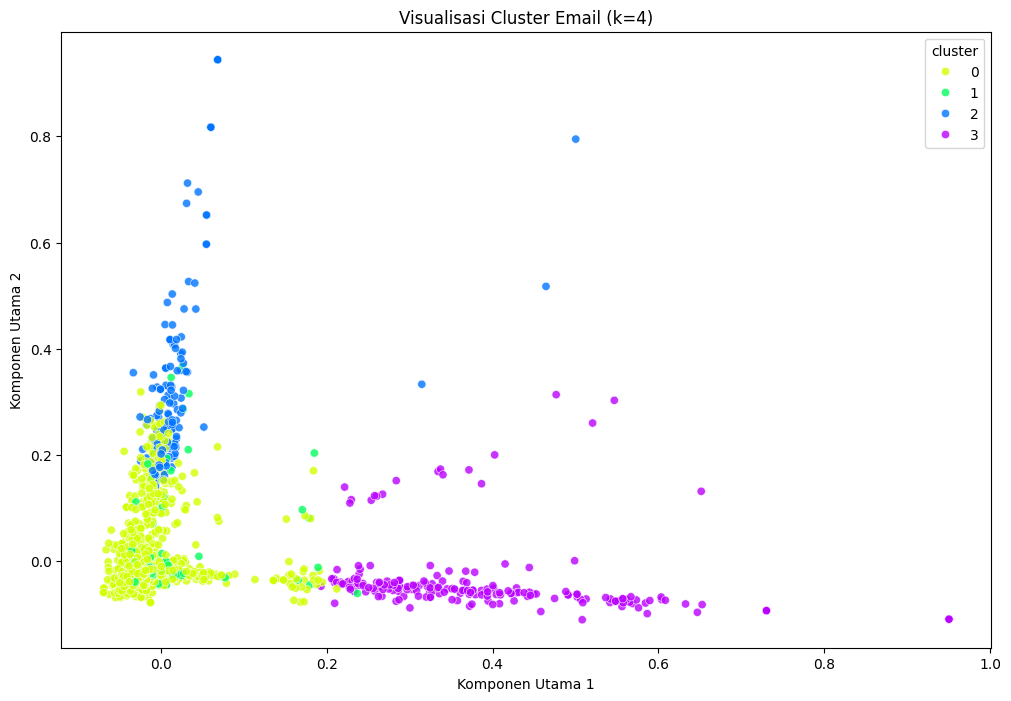

In [ ]:
try:
    # 7. Visualisasi Hasil Clustering Final (menggunakan PCA)
    # Menggunakan Principal Component Analysis (PCA) untuk mengurangi dimensi data TF-IDF menjadi 2 dimensi
    # agar bisa divisualisasikan dalam scatter plot 2D.
    pca = PCA(n_components=2)
    scatter_plot_points = pca.fit_transform(X_tfidf.toarray()) # Mengubah sparse matrix menjadi dense array untuk PCA.

    # Membuat DataFrame baru untuk visualisasi.
    df_plot = pd.DataFrame({
        'pca_1': scatter_plot_points[:, 0],
        'pca_2': scatter_plot_points[:, 1],
        'cluster': df_email['cluster'] # Menggunakan label cluster dari hasil KMeans.
    })

    # Membuat scatter plot dari hasil PCA, mewarnai titik berdasarkan cluster.
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        x='pca_1', y='pca_2',
        hue='cluster', # Warna titik berdasarkan kolom 'cluster'.
        data=df_plot,
        palette=sns.color_palette("hsv", optimal_k), # Menggunakan palet warna untuk membedakan cluster.
        legend="full", # Menampilkan legenda untuk cluster.
        alpha=0.8 # Mengatur transparansi titik.
    )
    plt.title(f'Visualisasi Cluster Email (k={optimal_k})')
    plt.xlabel('Komponen Utama 1')
    plt.ylabel('Komponen Utama 2')
    plt.show()

except FileNotFoundError:
    print("Error: File 'spam.csv' tidak ditemukan.")
except Exception as e:
    print(f"Terjadi error: {e}")